In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("chicago_taxi_synthetic.csv")  # Replace with your file path
df.head()


,trip_distance,trip_time,fare
0,7.803532,31.951447,26.772627
1,19.038929,68.697960,56.917004
2,14.773882,43.266537,43.744596
3,12.173840,54.068713,41.475445
4,3.542363,14.361427,14.234874


In [8]:
# Drop missing values if any
df = df.dropna()

In [9]:



# Select features and target
X = df[['trip_distance', 'trip_time']]
y = df['fare']


In [10]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:

# Predict on the test set
y_pred = model.predict(X_test)


In [13]:

# Evaluate the model
print("\n📊 Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



📊 Model Evaluation:
Mean Squared Error: 1.0940455847054589
R² Score: 0.9958848024441692
Coefficients: [1.96428705 0.25486485]
Intercept: 3.3172861449967925


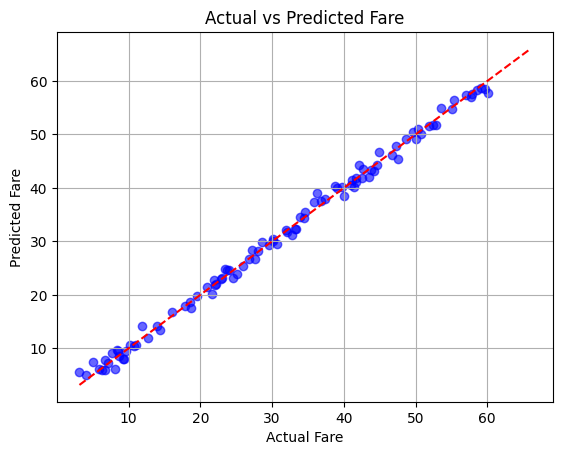

In [14]:

# Plot Actual vs Predicted fare
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.grid(True)
plt.show()


In [15]:

# === User Input Section ===
print("\n🧾 Enter ride details to predict fare:")
try:
    distance = float(input("Trip distance (in miles or km): "))
    time = float(input("Trip time (in minutes or seconds): "))
    
    # Create input for prediction
    new_data = pd.DataFrame([[distance, time]], columns=['trip_distance', 'trip_time'])
    predicted_fare = model.predict(new_data)[0]
    
    print(f"\n✅ Predicted Fare: ${predicted_fare:.2f}")

except ValueError:
    print("❌ Invalid input. Please enter numeric values.")



🧾 Enter ride details to predict fare:

✅ Predicted Fare: $52.81
